In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import json
import sys
import os
import matplotlib
#matplotlib.use('Agg') 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import pdb
#import ipdb
import h5py
import importlib
import pickle

# Add root folder to sys path
sys.path.append("../")

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (12.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

sns.set()

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Import own modules
# Need to use importlib since module starts with a numerical value.

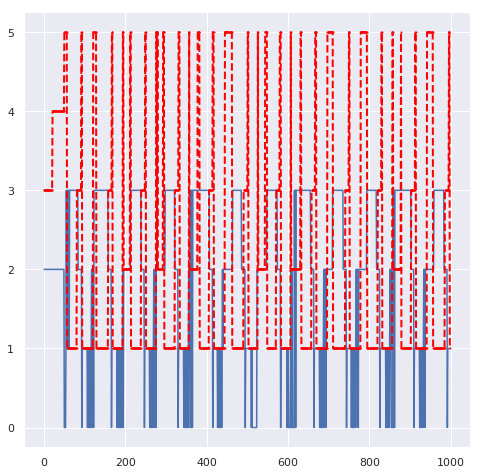

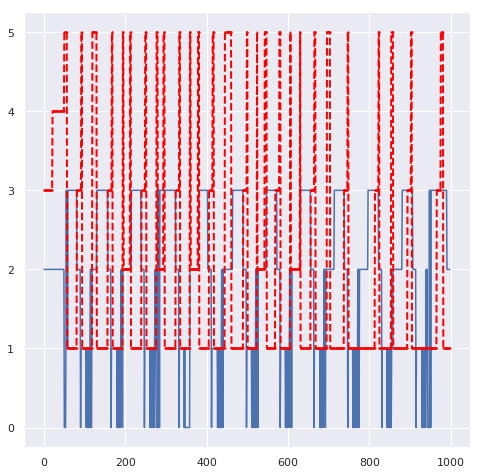

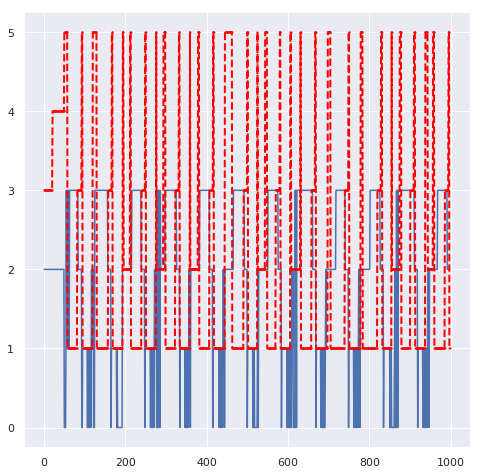

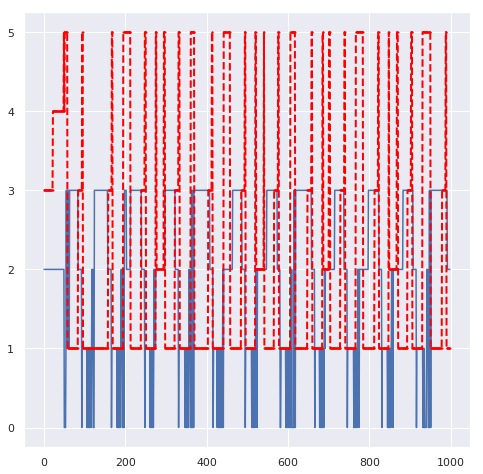

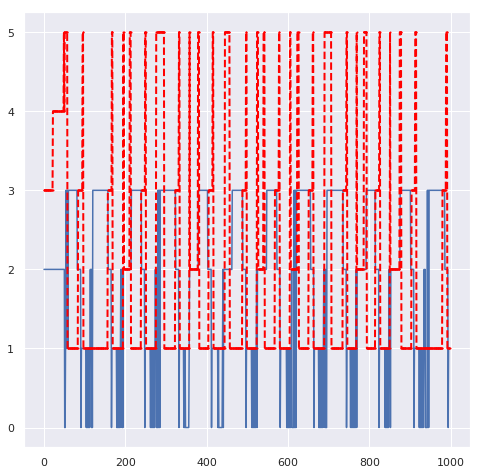

In [2]:
# traj_data_path = '../results/hopper/discrete_vae/batch_64_context_4_no_time/results/results_cp_640_vae_policy.pkl'
traj_data_path = '../results/hopper/discrete_vae/batch_64_context_4_no_time/results/results_cp_640_expert_states.pkl'

traj_data_path = '../results/hopper/discrete_vae/batch_64_context_8_no_time/results_expert_cp_960.pkl'
traj_data_path = '../results/hopper/discrete_vae/batch_64_context_8_no_time_try_2/results_280.pkl'

traj_data_path = '../results/hopper/discrete_vae/batch_64_context_4_no_time_try_2_init_temp_2/results_800.pkl'

traj_c_8_data_path = '../results/hopper/discrete_vae/batch_64_context_8_no_time_try_2_init_temp_2/results_800.pkl'

traj_data = pickle.load(open(traj_data_path, 'rb'))
traj_c_8_data = pickle.load(open(traj_c_8_data_path, 'rb'))

def visualize_pred_context(pred_context, pred_context_other=None, save_path=None):
    context_values = np.argmax(pred_context, axis=1)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(context_values)
    if pred_context_other is not None:
        ax.plot(np.argmax(pred_context_other, axis=1), 
                color='red', marker='o', linestyle='dashed',
                linewidth=2, markersize=1)
        
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

save_path = '../mujoco_results/hopper_context_8_plot'
for i in range(len(traj_data['pred_context'])):
    pred_context = traj_data['pred_context'][i].copy()
    pred_context = np.reshape(pred_context, (pred_context.shape[0], -1))
    if traj_c_8_data is not None:
        pred_context_8 = traj_c_8_data['pred_context'][i].copy()
        pred_context_8 = np.reshape(pred_context_8, (pred_context_8.shape[0], -1))
    path_i = os.path.join(save_path, 'result_{}.pdf'.format(i))
    visualize_pred_context(pred_context, pred_context_8, save_path=None)